<a href="https://colab.research.google.com/github/othoni-hub/M1-Maths-Algo/blob/main/M_1e_Tale_Approximations_numeriques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathématiques 
# 1<sup>ère</sup> - Terminale (spécialité, options complémentaire et experte)

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## Chapitre 2 : Calcul approché
## 2<sup>ème</sup> partie : - RÉSOLUTION APPROCHÉE D'ÉQUATIONS -

**O.THÖNI - IFUCOME -**

*Document à usage exclusif des étudiant·e·s actuel·le·s et passé·e·s du Master MEEF Mathématiques de l'Université Catholique de l'Ouest*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

**La fonction**

Nous allons étudier les (un des) zéros de la fonction f dont l'expression est f(x) = x<sup>3</sup> + x<sup>2</sup> - 6x + 2.


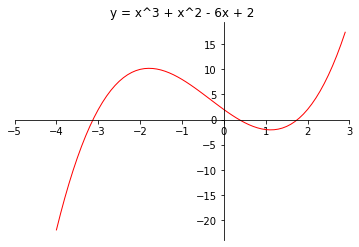

In [ ]:
# Définition de la fonction
def f(x):
    y = x**3 + x**2 -6*x + 2
    return y
    
import numpy as np
# Représentation graphique
xx = np.arange(-4,3,0.1) # liste numpy de -4 à 3 avec un pas de 0.1 (les listes natives avec range sont des listes d'entiers)
yy = []

for x in xx :
    yy.append(f(x))
    
p1 = plt.plot(xx,yy,'r',linewidth=1)

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.xlim(-5,3)
plt.title('y = x^3 + x^2 - 6x + 2')
plt.show()

Nous allons chercher une valeur approchée du zéro qui, apparamment, est compris entre 1 et 3.

In [ ]:
# précision souhaitée
nb_decimales = 5
epsilon = 10**(-nb_decimales)

#intervalle d'étude [1 ; 3]
a = 1
b = 3


### 1. Par balayage###

**<span style="color: #D17460">TCompl : valeur approchée d'une solution d'équation par balayage</span>**


Le principe est simple : on part de la borne gauche, 1 , où la fonction prend des valeurs négatives, et on avance pas à pas, avec un pas égal à la précision '*epsilon*' recherchée, jusqu'à ce que la fonction prenne sa première valeur positive, lieu de la valeur approchée par excès de la racine cherchée, à *epsilon* près. 

In [ ]:
u = a
compteur = 0
while f(u) < 0:
    compteur = compteur + 1
    u = u + epsilon
    
print('La valeur approchée par excès à ',epsilon,'près est : ',round(u,nb_decimales),'   après ',compteur,' itérations.')

La valeur approchée par excès à  1e-05 près est :  1.76156    après  76156  itérations.


### 2. Par dichotomie###

**<span style="color: #D17460">TSpé - TCompl : valeur approchée d'une solution d'équation par dichotomie</span>**

**<span style="color: #26B260">Python : test *if... : else :*</span>**



In [ ]:
compteur = 0
u = a
v = b
while v-u > epsilon :
    compteur = compteur + 1
    c = (u+v)/2
    if f(u)*f(c) < 0 :
        v = c
    else :
        u = c
        
print('Une valeur approchée à ',epsilon,'près est : ',round(c,nb_decimales),'   après ',compteur,' itérations.')

Une valeur approchée à  1e-05 près est :  1.76156    après  18  itérations.


**_Exercice_**

**<span style="color: #D17460">TCompl </span>**

Adapter la démarche précédente pour trouver une valeur approchée de ln(2) à l'aide de la fonction d'expression f(x) = e<sup>x</sup> - 2

### 3. Par la méthode de Newton###

**<span style="color: #D17460">TSpé : valeur approchée d'une solution d'équation par la méthode de Newton</span>**


(voir http://pcsi.kleber.free.fr/IPT/doc/INS2_Newton_et_Euler_codes.pdf)

In [ ]:
compteur = 0
x = b 
h = 1e-6
prec = a
while abs(x-prec) > epsilon :
    prec = x
    compteur = compteur + 1
    derivee = (f(x+h) - f(x)) / h # nombre dérivé approché en x
    x = x - f(x)/derivee 
    
print('Une valeur approchée à ',epsilon,'près est : ',round(x,nb_decimales),'   après ',compteur,' itérations.')

Une valeur approchée à  1e-05 près est :  1.76156    après  6  itérations.


### 4. Par la méthode de la sécante###

**<span style="color: #D17460">TSpé : valeur approchée d'une solution d'équation par la méthode de la sécante</span>**

![...](https://drive.google.com/uc?id=1q0z5GvdotQ5gERrR668hjCm8lZBvrvRr)


(voir https://fr.wikipedia.org/wiki/M%C3%A9thode_de_la_s%C3%A9cante
 voir aussi :  http://exo7.emath.fr/cours/ch_zeros.pdf)
 

![...](https://drive.google.com/uc?id=1av-ORTRBii-NoL8ZuW8qDVo0vz4QkI7a)

In [ ]:
def secante(f,a,b,epsilon):
    k = 0
    while abs(b-a) > epsilon and k < 100 :
        a,b = b, a - (b-a)* f(a) / (f(b)-f(a)) # affectation double évitant de faire appel à une variable auxiliaire
        # note a et b sont des variables locales, connues seulement de la fonction 'secante', 
        # on n'affecte (en son double-sens) donc pas les variables a et b du programme principal
        k = k + 1
        
    if k<100:
        return (b,k)
    else:
        raise ValueError('Divergence')
        # L’instruction raise permet au programmeur de déclencher une exception spécifique
        
x, compteur = secante(f,a,b,epsilon) # observer les passages en paramètres, les variable globales et locales à la fonction 'secante'
print('Une valeur approchée à ',epsilon,'près est : ',round(x,nb_decimales),'   après ',compteur,' itérations.')

Une valeur approchée à  1e-05 près est :  1.76156    après  10  itérations.


**_Illustration graphique_**

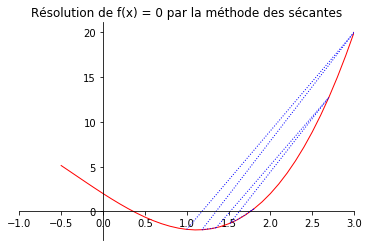

In [ ]:
xx = np.arange(-0.5,3.1,0.1) # liste numpy de -4 à 3 avec un pas de 0.1 (les listes natives avec range sont des listes d'entiers)
yy = []

for x in xx :
    yy.append(f(x))
    
p1 = plt.plot(xx,yy,'r',linewidth=1)

ax = plt.gca()

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.xlim(-1,3)
plt.title('Résolution de f(x) = 0 par la méthode des sécantes')
u = a
v = b
for k in range(10):
    plt.plot([u,v],[f(u),f(v)], 'b', linewidth = 1, linestyle = ':')
    u,v = v, u - (v-u)* f(u) / (f(v)-f(u))

plt.show()